In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image  

# A
http://cs231n.github.io/classification/#knn
### KNN : simple to implement and understand but takes time to test. unlike DNN;  used mostly in dataset with low dimensions
### CROSS-VALIDATION: when size of the dataset is small. used to tune and tweek the hyperparamters like the value of K.

# B
### W is like a classifier and template
### Image processing always center data (subtract mean) and normalize them [-1,1]
### SVM:  Multiclass Support Vector Machine (SVM) loss. The SVM loss is set up so that the SVM “wants” the correct class for each image to a have a score higher than the incorrect classes by some fixed margin Δ

<img src="SVM.png" style="width:500;height:450px;">


### L2 regularization :  Since the L2 penalty prefers smaller and more diffuse weight vectors, the final classifier is encouraged to take into account all input dimensions to small amounts rather than a few input dimensions and very strongly.

<img src="L2 reg.png" style="width:500;height:450px;">

### Setting Delta and BINARY SVM
<img src="delta and binarySVM.png" style="width:500;height:450px;">


# C : softmax & svm vs softmax

 <img src="softmax_numeric_stability.png" style="width:500;height:450px;">
 
 <img src="svm_vs_softmax.png" style="width:500;height:450px;">

   # svm care more about the result of classification and not micromanage. While softmax will consistently amplify the correct probablity
<img src="svm_vs_softmax2.png" style="width:500;height:450px;">

# D: softmax back-propagation

 <img src="softmax_bprop.jpg" style="width:500;height:450px;">

# E: SVM gradient descent & SGD
   ### The derivative on each variable tells you the sensitivity of the whole expression on its value.
   ### http://cs231n.github.io/optimization-2/

<img src="svm_gradient.png" style="width:500;height:450px;">
<img src="SGD.png" style="width:500;height:450px;">


# F: gradient desent notes

<img src="back_prop.png" style="width:500;height:450px;">


<img src="points_in_gradient.png" style="width:350;height:330px;">

   ## use dimension analysis
<img src="dimension_analysis.png" style="width:350;height:330px;">

# G: NN architecture

  ## activation choice
<img src='activation_choice.png' style="width:200;height:100px;">

  ## representation power
<img src="representation_power.png" style="width:200;height:100px;">

  ## small network will have different local minima with bigger variance, so your random start counts;
  ## big network has local minima as well, but with less variance
  ## use regularization to deal with the overfitting caused by bigger network

<img src="architecture.png" style="width:400;height:300px;">

# H: Normalisation, PCA, whitening(question about sqrt(S), I think should be square(S)

## 1、zero-centered and divided by std / or scaled to [-1,1].   X /=  np.std(X, axis=0)
##  pitfall: minus the mean from training data for test and validate dataset

## 2, PCA and Whitening
### SVD reference: http://www.cnblogs.com/LeftNotEasy/archive/2011/01/19/svd-and-applications.html

In [19]:
#X = np.random.choice(range(255),40).reshape(5,8)


##############
##PCA       ##
##############
# Assume input data matrix X of size [N x D]
X -= np.mean(X, axis = 0) # zero-center the data (important)
cov = np.dot(X.T, X) / X.shape[0] # get the data covariance matrix
# compute the svd of the covariance matrix
U,S,V = np.linalg.svd(cov)   #where the columns of U are the eigenvectors and S is a 1-D array of the singular values.

Xrot = np.dot(X, U) # decorrelate the data by projecting into the eigenbasis cause U is othonormal
Xrot_reduced = np.dot(X, U[:,:100]) # Xrot_reduced becomes [N x 100]


##############
##Whitening ##  
##############
# whiten the data:
# divide by the eigenvalues (which are square roots of the singular values)
Xwhite = Xrot / np.sqrt(S + 1e-5)

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [3]:
pu = np.array([[3,-1],[1,3],[1,1]])
U,S,V = np.linalg.svd(pu)
U,S,V

(array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
        [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
        [-4.08248290e-01, -1.94289029e-16,  9.12870929e-01]]),
 array([3.46410162, 3.16227766]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [9]:
np.linalg.eigvals(np.dot(pu,pu.T))

array([ 0., 10., 12.])

In [12]:
np.square(S)

array([12., 10.])

# I: Weights and bias initialisation: http://cs231n.github.io/neural-networks-2/
## In practice, use w = np.random.randn(n) * sqrt(2.0/n) (HE. et al.)

## weight init problem
<img src="weight_init_reason.png" style="width:400;height:300px;">


## how to decrease the variance of the output of each layer
<img src="weight_init.png" style="width:400;height:300px;">


## Batch Normalization
<img src="BatchNorm.png" style="width:400;height:300px;">

# J: LOSS FUNCTION
## SVM and SOFTMAX for classificaiton. L2 Norm and L1 norm for regression; 
## When faced with a regression task, first consider if it is absolutely necessary. 
## Instead, have a strong preference to discretizing your outputs to bins and perform classification over them whenever possible.

## （1）numpy.flatnonzero(): return the index of non-zero elements

In [2]:
x = np.arange(-3,3)
y = np.flatnonzero(x)
print(x,y)

[-3 -2 -1  0  1  2] [0 1 2 4 5]


In [4]:
d = np.array([1,2,3,4,4,3,5,3,6])
haa = np.flatnonzero(d == 3)
print (haa)

[2 5 7]


# (2) matplotlib.pyplot

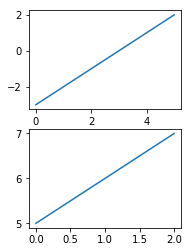

In [6]:
plt.subplot(2,2,1)
plt.plot(np.arange(-3,3))
plt.subplot(223)
plt.plot(np.arange(5,8))

# （3）np.argsort() ：argsort函数返回的是数组值从小到大的索引值

    --------
    One dimensional array:一维数组
    
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])
    
    Two-dimensional array:二维数组
    
    >>> x = np.array([[0, 3], [2, 2]])
    >>> x
    array([[0, 3],
           [2, 2]])
    
    >>> np.argsort(x, axis=0) #按列排序
    array([[0, 1],
           [1, 0]])
    
    >>> np.argsort(x, axis=1) #按行排序
    array([[0, 1],
           [0, 1]])

# (4) get the number with the most frequency
## np.bincount(); np.argmax() : return the index of the biggest number
   它大致说bin的数量比x中的最大值大1，每个bin给出了它的索引值在x中出现的次数。下面，我举个例子让大家更好的理解一下：

In [16]:
binc = np.array([2,1,3,2,2])
np.bincount(binc)

array([0, 1, 3, 1], dtype=int64)

索引值0有0个，索引值1在binc中有1个，索引值2有3个。。。

In [17]:
np.argmax(np.bincount(binc))

2

# (5) array_split : can split not evenly ([1,2],[2,3],[1]); hsplit, vsplit

In [24]:
sp = np.arange(24).reshape(4,6)

In [25]:
sp

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [26]:
np.hsplit(sp,3)

[array([[ 0,  1],
        [ 6,  7],
        [12, 13],
        [18, 19]]), array([[ 2,  3],
        [ 8,  9],
        [14, 15],
        [20, 21]]), array([[ 4,  5],
        [10, 11],
        [16, 17],
        [22, 23]])]

In [27]:
np.vsplit(sp,2)

[array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]]), array([[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])]

In [33]:
#对于应该分成n个部分的长度为l的数组，它将返回l％n个大小为l // n + 1的子数组，其余大小为l // n。
asp = np.arange(8)
np.array_split(asp,3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7])]

# (6) np.linalg.norm(a-b) : default to calculate euclidean distance

In [34]:
x1 = np.arange(4).reshape(2,2)
x2 = np.arange(8,12).reshape(2,2)
np.linalg.norm(x1-x2)

16.0

In [2]:
aaa = [1,2,3,4,5]
aaa[-1]

5

# (7) use the transform of the index

In [4]:
for i in range(5):
    indices = [x for x in np.arange(5) if x!=i]
    print(indices)

[1, 2, 3, 4]
[0, 2, 3, 4]
[0, 1, 3, 4]
[0, 1, 2, 4]
[0, 1, 2, 3]


# (8) np.concatenate(x,axis=0) : default axis=0; x could be array or list

In [11]:
li = [[1,2],[3,4],[5,6]]
np.concatenate((li))

array([1, 2, 3, 4, 5, 6])

In [12]:
type(li)

list

# (9) print format

In [13]:
num_correct=100
num_test=200 
accuracy=num_correct/num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 100 / 200 correct => accuracy: 0.500000


In [8]:
abc = np.array([[2,3],[2,3]])
abc**2

array([[4, 9],
       [4, 9]], dtype=int32)

# (10) SVM: select the correct position 

In [18]:
yy = np.arange(20).reshape(4,5)

In [20]:
z = np.array([2,3,1,4])
ya = yy[np.arange(4),z]
yy,ya,ya.shape

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]), array([ 2,  8, 11, 19]), (4,))

# (11) calculat the accuracy : np.mean / np.sum

In [25]:
xxx = np.array([1,2,3,5,1,2])
yyy = np.array([1,4,3,5,1,4])
print(xxx==yyy)
print(np.mean(xxx==yyy))

[ True False  True  True  True False]
0.6666666666666666


In [26]:
np.sum(xxx==yyy)/xxx.shape[0]

0.6666666666666666

# (12) dictionary add 

In [27]:
p = {}
hhh = (1,2)
uuu = (3,4)
p[hhh]=uuu
p

{(1, 2): (3, 4)}

In [3]:
bn_params = [{'mode': 'train'} for i in range(5)]

In [4]:
bn_params

[{'mode': 'train'},
 {'mode': 'train'},
 {'mode': 'train'},
 {'mode': 'train'},
 {'mode': 'train'}]

# (13) transform data into integer that can be interpreted by imshow()

In [31]:
o=np.array([1.83])
o.astype('uint8')

array([1], dtype=uint8)

In [39]:
m = np.random.randn(3,5,4,4)
m2 = m.reshape(1,1,40,6)
m1=m2.squeeze()
m2.shape,m1.shape

((1, 1, 40, 6), (40, 6))

# (14) np.nditer()

In [16]:
fff = np.arange(10,60,5).reshape(5,2)
ggg = np.arange(89,99).reshape(5,2)
fff, ggg

(array([[10, 15],
        [20, 25],
        [30, 35],
        [40, 45],
        [50, 55]]), array([[89, 90],
        [91, 92],
        [93, 94],
        [95, 96],
        [97, 98]]))

In [22]:
it = np.nditer(fff,flags=['multi_index'],op_flags=['readwrite'])

In [23]:
while not it.finished:
    print(it.multi_index)
    print(ggg[it.multi_index])
    it.iternext()

(0, 0)
89
(0, 1)
90
(1, 0)
91
(1, 1)
92
(2, 0)
93
(2, 1)
94
(3, 0)
95
(3, 1)
96
(4, 0)
97
(4, 1)
98


In [27]:
for i,j in ggg:
    print(i)
    print(j)

89
90
91
92
93
94
95
96
97
98


In [32]:
z=[1,3,4,5]
np.random.shuffle(z)
print(z)

[1, 4, 5, 3]


In [3]:
a = np.random.rand(9,8)
a

array([[0.32581852, 0.33236459, 0.87777302, 0.17006512, 0.36498501,
        0.38142056, 0.25574457, 0.01856814],
       [0.95676079, 0.78096187, 0.1045631 , 0.11143345, 0.06427278,
        0.76144642, 0.2269553 , 0.79879589],
       [0.504224  , 0.52608258, 0.23481732, 0.25278541, 0.39915874,
        0.45083524, 0.02376543, 0.53968173],
       [0.99565754, 0.07425629, 0.76384628, 0.55790013, 0.6258166 ,
        0.90497396, 0.98692905, 0.42854909],
       [0.8938137 , 0.48721419, 0.80608292, 0.83257785, 0.56254773,
        0.76168252, 0.58780896, 0.98789628],
       [0.5286585 , 0.09005686, 0.36842714, 0.18317892, 0.40292285,
        0.77226266, 0.72782972, 0.03487539],
       [0.81224783, 0.49600539, 0.65107118, 0.74581115, 0.90233743,
        0.18794462, 0.26182351, 0.15367157],
       [0.02424014, 0.59239878, 0.44288338, 0.14803217, 0.62036244,
        0.99337334, 0.09530035, 0.91759669],
       [0.94937236, 0.99606763, 0.28416782, 0.07843494, 0.83899019,
        0.22379669, 0.871880

In [7]:
y = np.random.randint(0,8,(9,))
y

array([6, 4, 5, 4, 6, 1, 5, 7, 0])

In [9]:
a[:,y].shape

(9, 9)

In [11]:
a[range(9),y]

array([0.25574457, 0.06427278, 0.45083524, 0.6258166 , 0.58780896,
       0.09005686, 0.18794462, 0.91759669, 0.94937236])

In [20]:
z = np.vstack([range(9),y]).reshape(9,2)
z

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 6],
       [4, 5],
       [4, 6],
       [1, 5],
       [7, 0]])

In [22]:
a[z].shape

(9, 2, 8)

In [26]:
w = np.zeros((6,8))
x = np.random.rand(9,6)
w[:,y]=x[y,:]
w

ValueError: shape mismatch: value array of shape (9,6) could not be broadcast to indexing result of shape (9,6)

In [39]:
np.max([5,0],[4,3])

TypeError: 'list' object cannot be interpreted as an integer

In [31]:
a


array([[0.32581852, 0.33236459, 0.87777302, 0.17006512, 0.36498501,
        0.38142056, 0.25574457, 0.01856814],
       [0.95676079, 0.78096187, 0.1045631 , 0.11143345, 0.06427278,
        0.76144642, 0.2269553 , 0.79879589],
       [0.504224  , 0.52608258, 0.23481732, 0.25278541, 0.39915874,
        0.45083524, 0.02376543, 0.53968173],
       [0.99565754, 0.07425629, 0.76384628, 0.55790013, 0.6258166 ,
        0.90497396, 0.98692905, 0.42854909],
       [0.8938137 , 0.48721419, 0.80608292, 0.83257785, 0.56254773,
        0.76168252, 0.58780896, 0.98789628],
       [0.5286585 , 0.09005686, 0.36842714, 0.18317892, 0.40292285,
        0.77226266, 0.72782972, 0.03487539],
       [0.81224783, 0.49600539, 0.65107118, 0.74581115, 0.90233743,
        0.18794462, 0.26182351, 0.15367157],
       [0.02424014, 0.59239878, 0.44288338, 0.14803217, 0.62036244,
        0.99337334, 0.09530035, 0.91759669],
       [0.94937236, 0.99606763, 0.28416782, 0.07843494, 0.83899019,
        0.22379669, 0.871880

In [71]:
np.max(a,axis=1)

array([0.87777302, 0.95676079, 0.53968173, 0.99565754, 0.98789628,
       0.77226266, 0.90233743, 0.99337334, 0.99606763])

In [34]:
n= np.random.rand(1,5)
n[:,3]

array([0.65152147])

In [43]:
ww = np.sum(a,axis=1,keepdims=True)

In [44]:
yy=np.sum(a,axis=1)

In [45]:
ww.shape,yy.shape

((9, 1), (9,))

In [46]:
range(5)

range(0, 5)

In [47]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [70]:
a

array([[0.32581852, 0.33236459, 0.87777302, 0.17006512, 0.36498501,
        0.38142056, 0.25574457, 0.01856814],
       [0.95676079, 0.78096187, 0.1045631 , 0.11143345, 0.06427278,
        0.76144642, 0.2269553 , 0.79879589],
       [0.504224  , 0.52608258, 0.23481732, 0.25278541, 0.39915874,
        0.45083524, 0.02376543, 0.53968173],
       [0.99565754, 0.07425629, 0.76384628, 0.55790013, 0.6258166 ,
        0.90497396, 0.98692905, 0.42854909],
       [0.8938137 , 0.48721419, 0.80608292, 0.83257785, 0.56254773,
        0.76168252, 0.58780896, 0.98789628],
       [0.5286585 , 0.09005686, 0.36842714, 0.18317892, 0.40292285,
        0.77226266, 0.72782972, 0.03487539],
       [0.81224783, 0.49600539, 0.65107118, 0.74581115, 0.90233743,
        0.18794462, 0.26182351, 0.15367157],
       [0.02424014, 0.59239878, 0.44288338, 0.14803217, 0.62036244,
        0.99337334, 0.09530035, 0.91759669],
       [0.94937236, 0.99606763, 0.28416782, 0.07843494, 0.83899019,
        0.22379669, 0.871880

In [74]:
np.max(a,axis=1)

array([0.87777302, 0.95676079, 0.53968173, 0.99565754, 0.98789628,
       0.77226266, 0.90233743, 0.99337334, 0.99606763])

In [64]:
a.shape

(9, 8)

In [84]:
i = np.random.rand(1,3)
r=i[0:1,2:100]

In [85]:
r

array([[0.15693068]])

In [77]:
np.int(3.6)

3

In [96]:
np.random.randint(1,5)

3

In [97]:
a

array([[0.32581852, 0.33236459, 0.87777302, 0.17006512, 0.36498501,
        0.38142056, 0.25574457, 0.01856814],
       [0.95676079, 0.78096187, 0.1045631 , 0.11143345, 0.06427278,
        0.76144642, 0.2269553 , 0.79879589],
       [0.504224  , 0.52608258, 0.23481732, 0.25278541, 0.39915874,
        0.45083524, 0.02376543, 0.53968173],
       [0.99565754, 0.07425629, 0.76384628, 0.55790013, 0.6258166 ,
        0.90497396, 0.98692905, 0.42854909],
       [0.8938137 , 0.48721419, 0.80608292, 0.83257785, 0.56254773,
        0.76168252, 0.58780896, 0.98789628],
       [0.5286585 , 0.09005686, 0.36842714, 0.18317892, 0.40292285,
        0.77226266, 0.72782972, 0.03487539],
       [0.81224783, 0.49600539, 0.65107118, 0.74581115, 0.90233743,
        0.18794462, 0.26182351, 0.15367157],
       [0.02424014, 0.59239878, 0.44288338, 0.14803217, 0.62036244,
        0.99337334, 0.09530035, 0.91759669],
       [0.94937236, 0.99606763, 0.28416782, 0.07843494, 0.83899019,
        0.22379669, 0.871880

In [99]:
np.argmax(a,axis=1)

array([2, 0, 7, 0, 7, 5, 4, 5, 1])